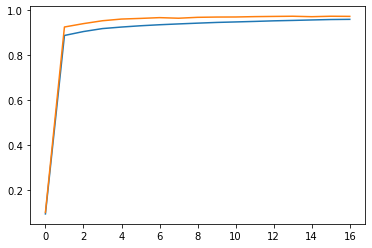

In [19]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
import import_ipynb
from BackPropagation_TwoLayerNet import TwoLayerNet
import matplotlib.pylab as plt

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
network1 = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
network2 = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate1 = 0.05
learning_rate2 = 0.2


train_loss_list_1 = []
train_acc_list_1 = []
test_acc_list_1 = []

train_loss_list_2 = []
train_acc_list_2 = []
test_acc_list_2 = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grad1 = network1.gradient(x_batch, t_batch)
    grad2 = network2.gradient(x_batch, t_batch)
    
    for key in ('W1', 'b1', 'W2', 'b2'):
        network1.params[key] -= learning_rate_1 * grad1[key]
        network2.params[key] -= learning_rate_2 * grad2[key]
    
    loss_1 = network1.loss(x_batch, t_batch)
    loss_2 = network2.loss(x_batch, t_batch)
    
    if i % iter_per_epoch == 0:
        train_acc_1 = network1.accuracy(x_train, t_train)
        test_acc_1 = network1.accuracy(x_test, t_test)
        train_acc_list_1.append(train_acc_1)
        test_acc_list_1.append(test_acc_1)
        
        train_acc_2 = network2.accuracy(x_train, t_train)
        test_acc_2 = network2.accuracy(x_test, t_test)
        train_acc_list_2.append(train_acc_2)
        test_acc_list_2.append(test_acc_2)
        
        
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
plt.plot(x, test_acc_list_1)
plt.plot(x, test_acc_list_2)